<p style="text-align: center"><a href='https://twinsolar.eu/'><img src="https://twinsolar.eu/wp-content/uploads/2023/03/logo_twinsolar_seul.png" width="200"><img src="https://twinsolar.eu/wp-content/uploads/2023/03/EN_FundedbytheEU_RGB_POS.png" width="200"></p></p></a>
<p style="text-align: center"><a href='https://twinsolar.eu/'>https://twinsolar.eu/</a></p>

# Workshop: Modelling individual components and a whole energy system, which integrates a large share of variable renewables

<h2>Part 1: PV system modelling</h2>

<h3>Data visualization</h3>

Run this short Jupyter Notebook to preview the data prepared for the workshop.

In [28]:
# Init environement
import pandas as pd
import matplotlib.pyplot as plt

<h3>Import and display the weather data</h3>

The weather data are recorded by University of La Reunion's Weather station located in the Terre Sainte Campus (21°20'S, 55°29'E, 75m, GMT/UTC+4h). The data are consolidated  with filtering and gap filling. But no quality check have been performed.

Period: 2022-10-01 00:00:00 to 2022-10-15 23:50:00

Time step: 10 minutes

Columns:
1. datetime: Timestamp, end of recording period
2. GHI: Global Horizontal Irradiance in W/m2
3. BNI: Beam Normal Irradiance in W/m2 measured on a sun tracker
4. DHI: Diffuse Horizontal Irradiance in W/m2, measured on a sun tracker
5. DBT: Dry Bulb Temperature in °C
6. RH: Relative Humidity in %
7. Ws10: Wind speed at 10m in m/s
8. Wd10: Wind direction at 10m in degrees clokwise from North (0°), East (90°), South (180°), West (270°)
9. Patmo: atmospheric pressure in mB (hPa)
10. Rainfall: Cumulative precipitation in mm

In [29]:
# Import weather data from file
df_weather = pd.read_csv('Meteo_Terre_Sainte_01-15-10-2022.txt')
df_weather.set_index('datetime', inplace=True)

df_weather.head()

,GHI,BNI,DHI,DBT,RH,Ws10,Wd10,Patmo,Rainfall
datetime,,,,,,,,,
2022-10-01 00:00:00+04:00,0.0,0.0,0.0,19.334,76.763,1.8955,59.739,1021.0,0.0
2022-10-01 00:10:00+04:00,0.0,0.0,0.0,19.077,74.063,0.7622,66.277,1021.0,0.0
2022-10-01 00:20:00+04:00,0.0,0.0,0.0,19.079,73.598,0.6355,73.171,1021.0,0.0
2022-10-01 00:30:00+04:00,0.0,0.0,0.0,19.141,73.279,1.2122,75.118,1021.0,0.0
2022-10-01 00:40:00+04:00,0.0,0.0,0.0,18.595,74.680,0.5601,77.000,1021.0,0.0


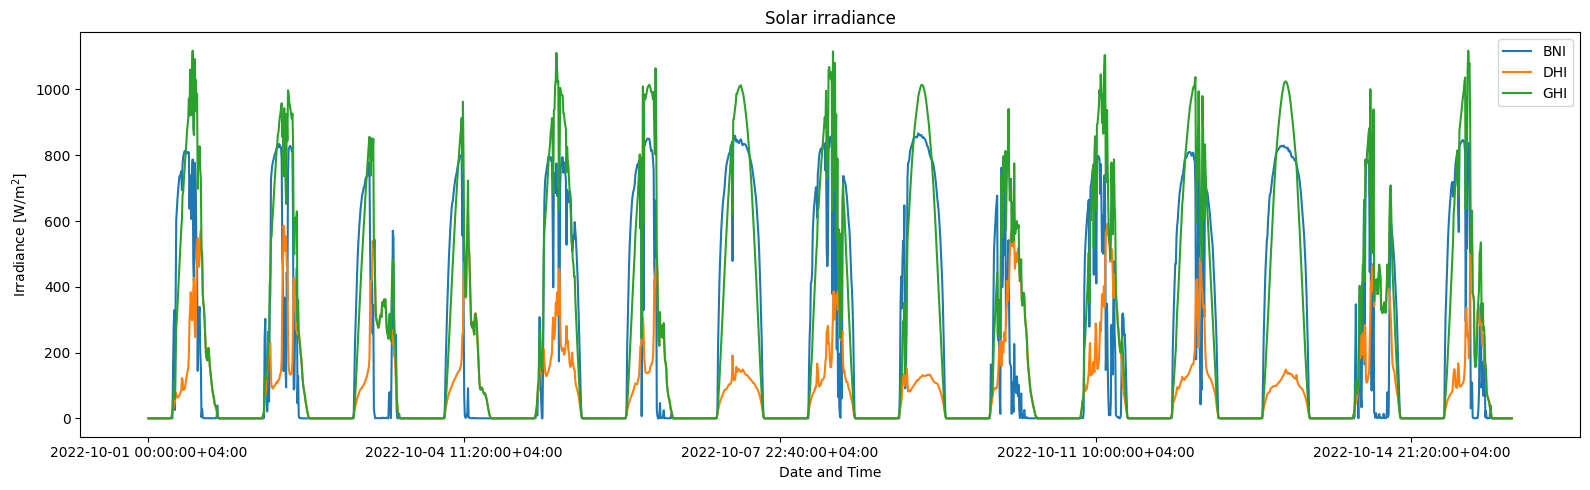

In [30]:
# Display the 3 components of solar irradiance: beam normal (BNI), diffuse horizontal (DHI) and global horizontal (GHI)

plt.figure(figsize=(16,5))
df_weather['BNI'].plot(label='BNI')
df_weather['DHI'].plot(label='DHI')
ax1 = df_weather['GHI'].plot(label='GHI')
ax1.set_ylabel('Irradiance [W/m$^2$]')
ax1.set_xlabel('Date and Time')
ax1.set_title('Solar irradiance')
plt.legend()
plt.tight_layout()
plt.show()

<h3>Import and display the PV system data</h3>

The data were recorded on a 49.14 kWp PV plant installed on the roofs of the ENERPOS building located in the Terre Sainte Campus. The company Sunzil operates the plant and provided the data.

The PV system is integrated on the over-roofs of the building and it has been commissionned in 2008. 144 modules TENESOL TE2000 with a rated power of 210 Wp cover 2 roofs with opposite orientations. Details of the system are summarized below :

<b>Roof 1: over-roof well ventilated, slope 9°, 14° North-East, 18.9 kWp</b>
* Inverter 1 DELTA RPI M10A / MPPT 1: 36 modules, 7.56 kWp
* Inverter 1 DELTA RPI M10A / MPPT 2: 18 modules, 3.78 kWp
* Inverter 2 DELTA RPI M10A / MPPT 1: 18 modules, 3.78 kWp
* Inverter 2 DELTA RPI M10A / MPPT 2: 18 modules, 3.78 kWp

<b>Roof 2: over-roof well ventilated, slope 9°, 194° South-West, 30.24 kWp</b>
* Inverter 3 DELTA RPI M15A / MPPT 1: 36 modules, 7.56 kWp
* Inverter 3 DELTA RPI M15A / MPPT 2: 36 modules, 7.56 kWp
* Inverter 4 DELTA RPI M15A / MPPT 1: 36 modules, 7.56 kWp
* Inverter 4 DELTA RPI M15A / MPPT 2: 36 modules, 7.56 kWp

Period: 2022-10-01 00:00:00 to 2022-10-15 23:50:00

Time step: 10 minutes

Columns
1. timestamp: Timestamp, end of recording period
2. POA_NE: Plan of array irradiance roof 1 North-East in W/m2
3. POA_SW: Plan of array irradiance roof 2 South-West in W/m2
4. Inv1_AC: Inverter 1 output AC power in W
5. Inv1_DC_MPPT1: Inverter 1 input MPPT 1 DC power in W
6. Inv1_DC_MPPT2: Inverter 1 input MPPT 2 DC power in W
7. Inv2_AC: Inverter 2 output AC power in W
8. Inv2_DC_MPPT1: Inverter 2 input MPPT 1 DC power in W
9. Inv2_DC_MPPT2: Inverter 2 input MPPT 2 DC power in W
10. Inv3_AC: Inverter 3 output AC power in W
11. Inv3_DC_MPPT1: Inverter 3 input MPPT 1 DC power in W
12. Inv3_DC_MPPT2: Inverter 3 input MPPT 2 DC power in W
13. Inv4_AC: Inverter 4 output AC power in W
14. Inv4_DC_MPPT1: Inverter 4 input MPPT 1 DC power in W
15. Inv4_DC_MPPT2: Inverter 4 input MPPT 2 DC power in W

In [31]:
# Import PV system data from file
df_PV = pd.read_csv('PV_ENERPOS_01-15-10-2022_bis.txt')
df_PV.set_index('datetime', inplace=True)

df_PV.head()

,POA_NE,POA_SW,Inv1_AC,Inv1_DC_MPPT1,Inv1_DC_MPPT2,Inv2_AC,Inv2_DC_MPPT1,Inv2_DC_MPPT2,Inv3_AC,Inv3_DC_MPPT1,Inv3_DC_MPPT2,Inv4_AC,Inv4_DC_MPPT1,Inv4_DC_MPPT2
datetime,,,,,,,,,,,,,,
2022-10-01 00:00:00+04:00,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2022-10-01 00:10:00+04:00,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2022-10-01 00:20:00+04:00,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2022-10-01 00:30:00+04:00,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2022-10-01 00:40:00+04:00,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


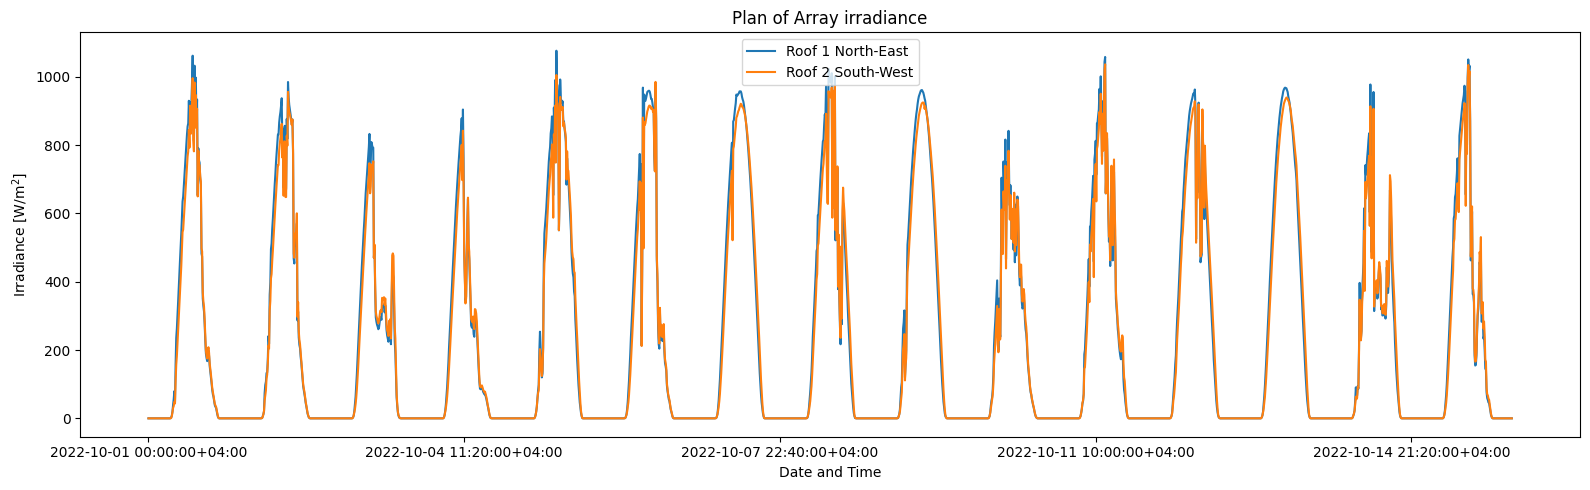

In [32]:
# Display the plan of array irrandiances of roofs 1 and 2

plt.figure(figsize=(16,5))
df_PV['POA_NE'].plot(label='Roof 1 North-East')
ax2 = df_PV['POA_SW'].plot(label='Roof 2 South-West')
ax2.set_ylabel('Irradiance [W/m$^2$]')
ax2.set_xlabel('Date and Time')
ax2.set_title('Plan of Array irradiance')
plt.legend()
plt.tight_layout()
plt.show()

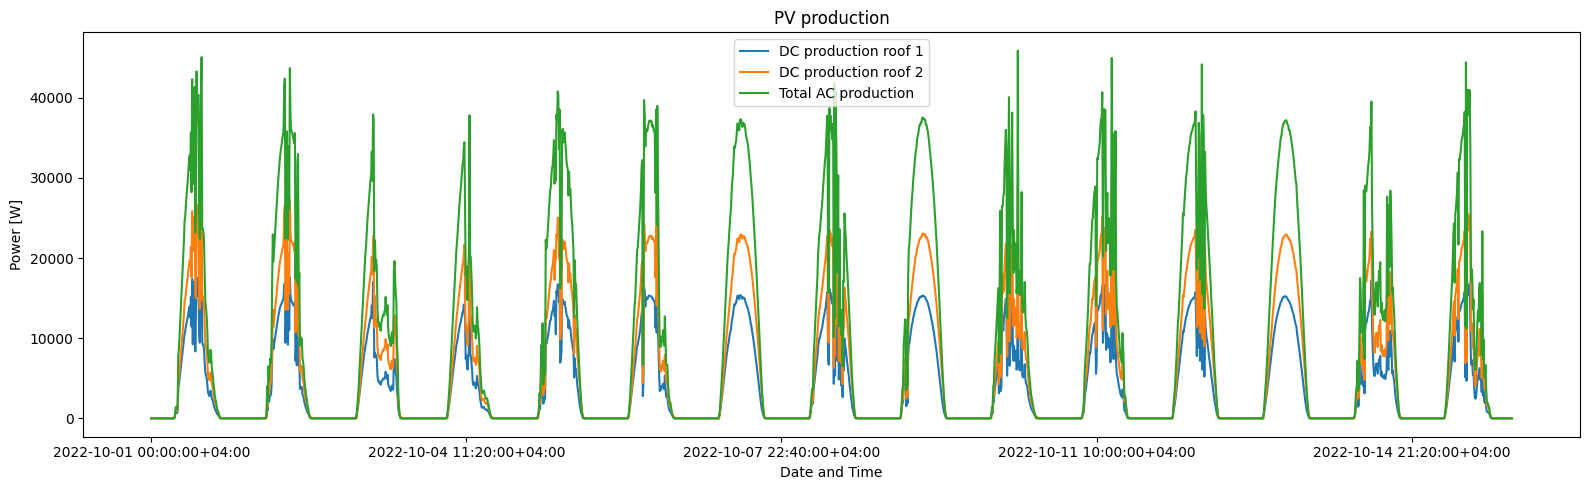

In [33]:
# Display the total DC and AC PV production

DC_prod_roof1 = (df_PV['Inv1_DC_MPPT1'] + df_PV['Inv1_DC_MPPT2'] +
            df_PV['Inv2_DC_MPPT1'] + df_PV['Inv2_DC_MPPT2'])

DC_prod_roof2 = (df_PV['Inv3_DC_MPPT1'] + df_PV['Inv3_DC_MPPT2'] +
            df_PV['Inv4_DC_MPPT1'] + df_PV['Inv4_DC_MPPT2'])

AC_prod = df_PV['Inv1_AC'] + df_PV['Inv2_AC'] + df_PV['Inv3_AC'] + df_PV['Inv4_AC']

plt.figure(figsize=(16,5))
DC_prod_roof1.plot(label='DC production roof 1')
DC_prod_roof2.plot(label='DC production roof 2')
ax2 = AC_prod.plot(label='Total AC production')
ax2.set_ylabel('Power [W]')
ax2.set_xlabel('Date and Time')
ax2.set_title('PV production')
plt.legend()
plt.tight_layout()
plt.show()